<a href="https://colab.research.google.com/github/ipevendelin/Nonlinear-Dimensionality-Reduction/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=0138b27568e28c0d540e92e8650e17e05c1147aa97e9a9afd83656738724b4af
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aadeshkoirala/mnist-784")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mnist-784' dataset.
Path to dataset files: /kaggle/input/mnist-784


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
import seaborn as sns
%matplotlib inline
sns.set(style="white", font_scale=1.1)

### 4. Load and Preprocess MNIST


In [4]:
import kagglehub

# Download latest version
print("Downloading MNIST-784 dataset via kagglehub...")
path = kagglehub.dataset_download("aadeshkoirala/mnist-784")

print("Dataset downloaded to:", path)

Using Colab cache for faster access to the 'mnist-784' dataset.
Dataset downloaded to: /kaggle/input/mnist-784


In [5]:
import pandas as pd
import numpy as np

# Load training data (contains labels)
# Assuming 'path' variable from a previous cell holds the dataset path
# If not, replace with the actual path to your dataset file
try:
    train_df = pd.read_csv("/content/sample_data/mnist_train_small.csv", header=None)
except NameError:
    print("Variable 'path' not found. Please ensure the dataset path is defined.")
    # Replace with the actual path if 'path' is not defined
    # For example: train_df = pd.read_csv("/content/mnist_train_small.csv")
    raise

# Rename the first column to 'label'
train_df = train_df.rename(columns={0: 'label'})

X = train_df.drop('label', axis=1).values.astype('float32')
y = train_df['label'].values

# Normalize to [0,1]
X = X / 255.0

print(f"Training samples: {X.shape[0]}, Features: {X.shape[1]}")
print(f"Labels: {np.unique(y)}")

Training samples: 20000, Features: 784
Labels: [0 1 2 3 4 5 6 7 8 9]


In [6]:
from minisom import MiniSom

grid_rows, grid_cols = 20, 20
input_len = X.shape[1]  # 784

som = MiniSom(
    x=grid_rows,
    y=grid_cols,
    input_len=input_len,
    sigma=2.5,
    learning_rate=0.5,
    neighborhood_function='gaussian',
    random_seed=42
)

print("Training SOM (20,000 iterations)...")
som.train_random(X, num_iteration=20000, verbose=True)
print("Training complete.")

Training SOM (20,000 iterations)...
 [ 20000 / 20000 ] 100% - 0:00:00 left 
 quantization error: 5.154732981905683
Training complete.


# Task
Visualize the weights, compute and visualize the u-matrix, and map data and visualize labels using the trained SOM model.

## Visualize the weights

### Subtask:
Reshape and plot the weight vectors of each neuron as images on the SOM grid.


**Reasoning**:
Create a figure and subplots, iterate through SOM neurons, reshape and plot the weight vectors as images.



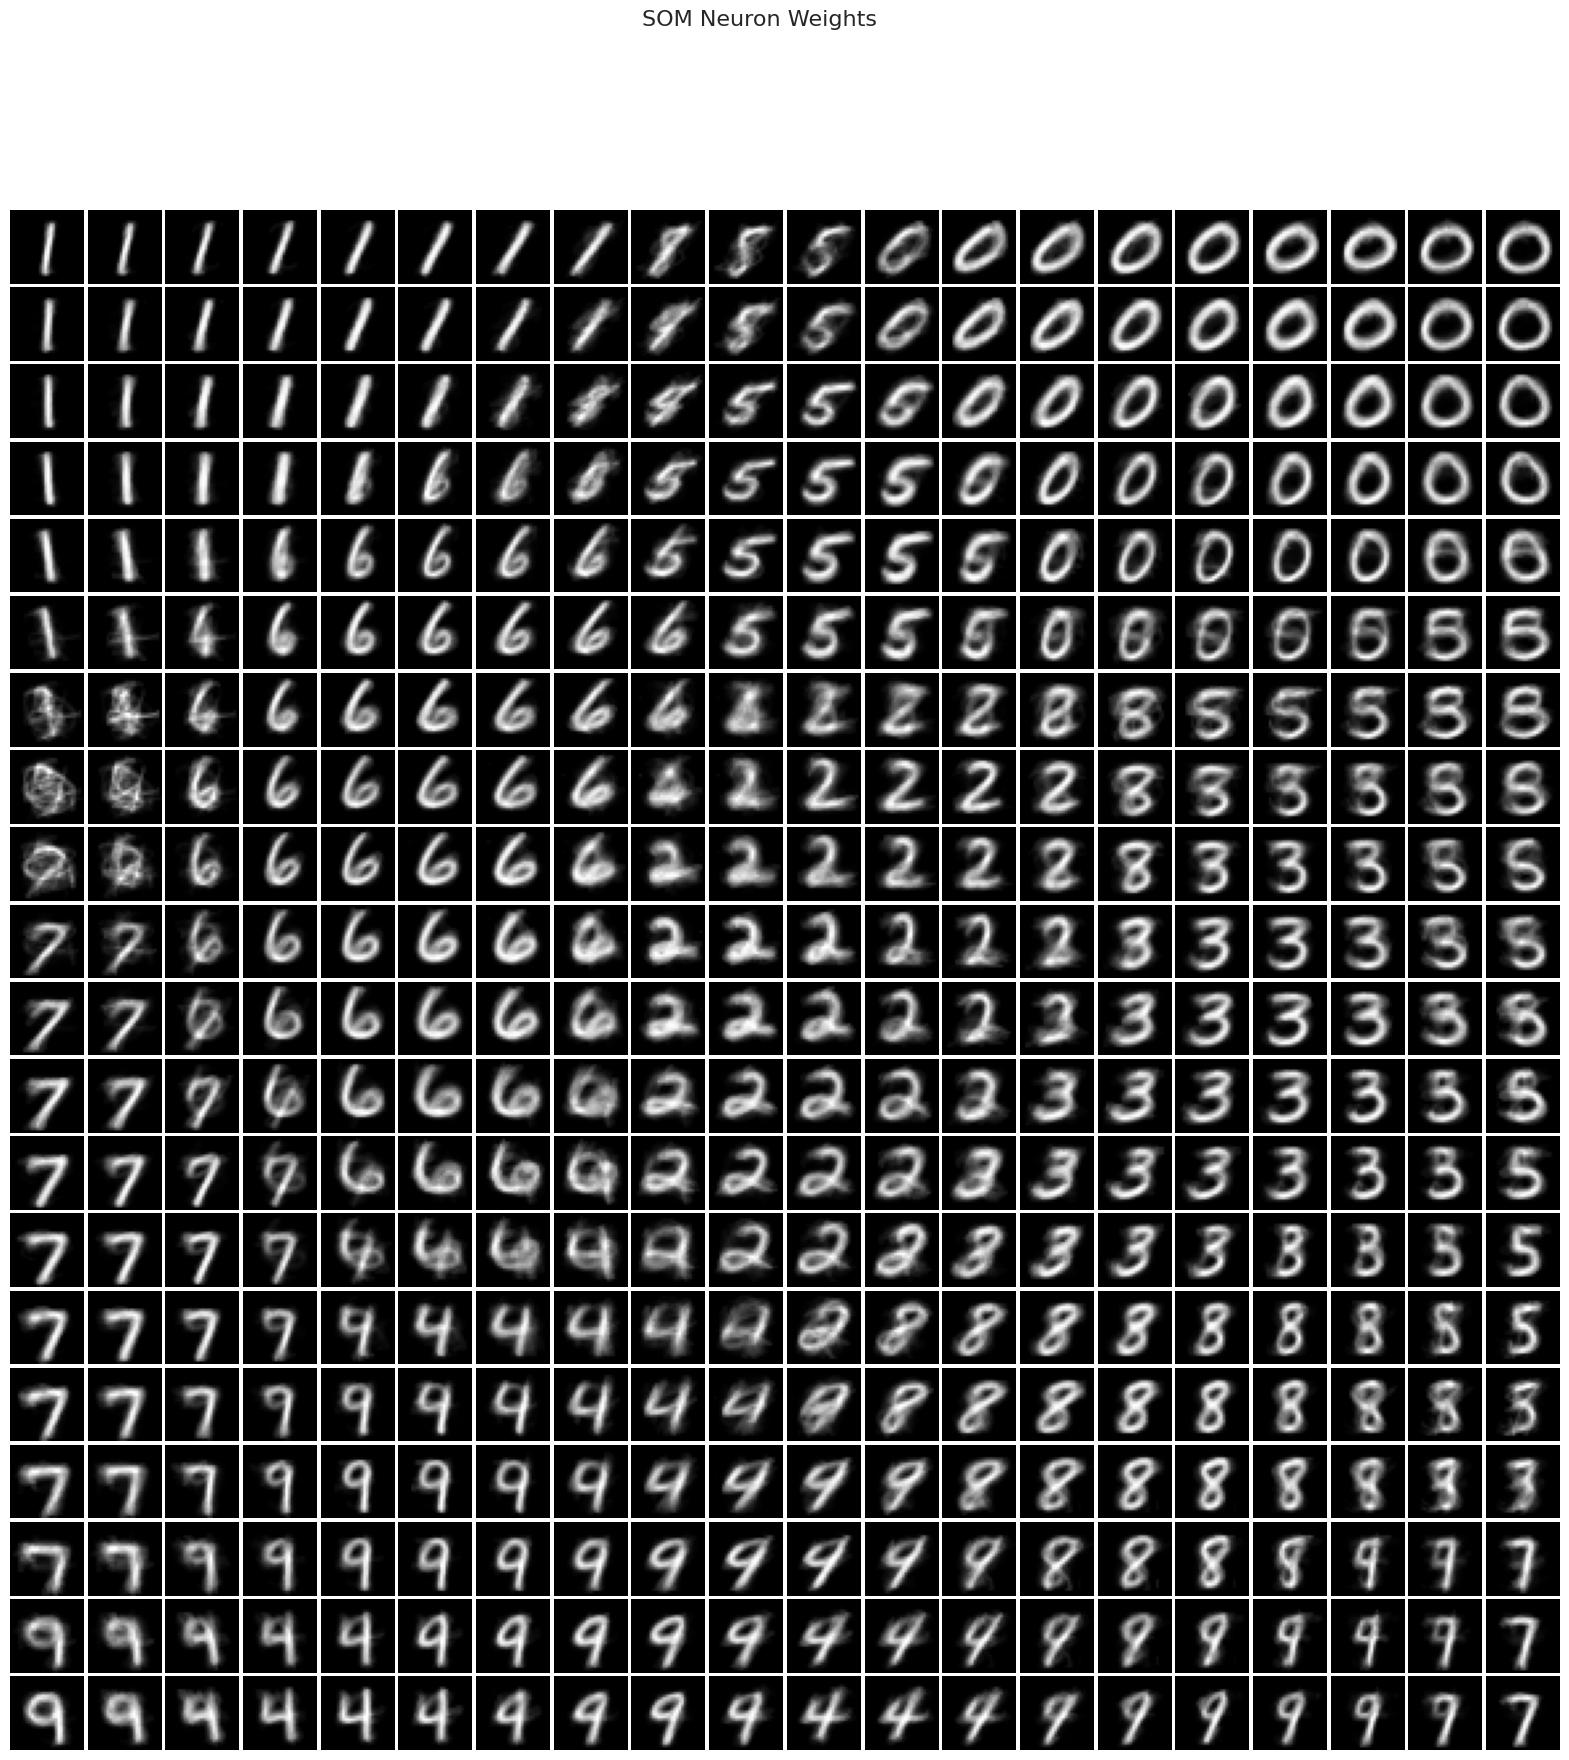

In [7]:
fig = plt.figure(figsize=(grid_cols, grid_rows))
for i in range(grid_rows):
    for j in range(grid_cols):
        ax = fig.add_subplot(grid_rows, grid_cols, i * grid_cols + j + 1)
        weights = som.get_weights()[i, j].reshape(28, 28)
        ax.imshow(weights, cmap='gray')
        ax.axis('off')

fig.suptitle("SOM Neuron Weights", fontsize=16)
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

## Compute and visualize the u-matrix

### Subtask:
Compute the U-matrix and visualize it to show distances between neighboring neurons and identify clusters.


**Reasoning**:
Compute and visualize the U-matrix to show distances between neighboring neurons.



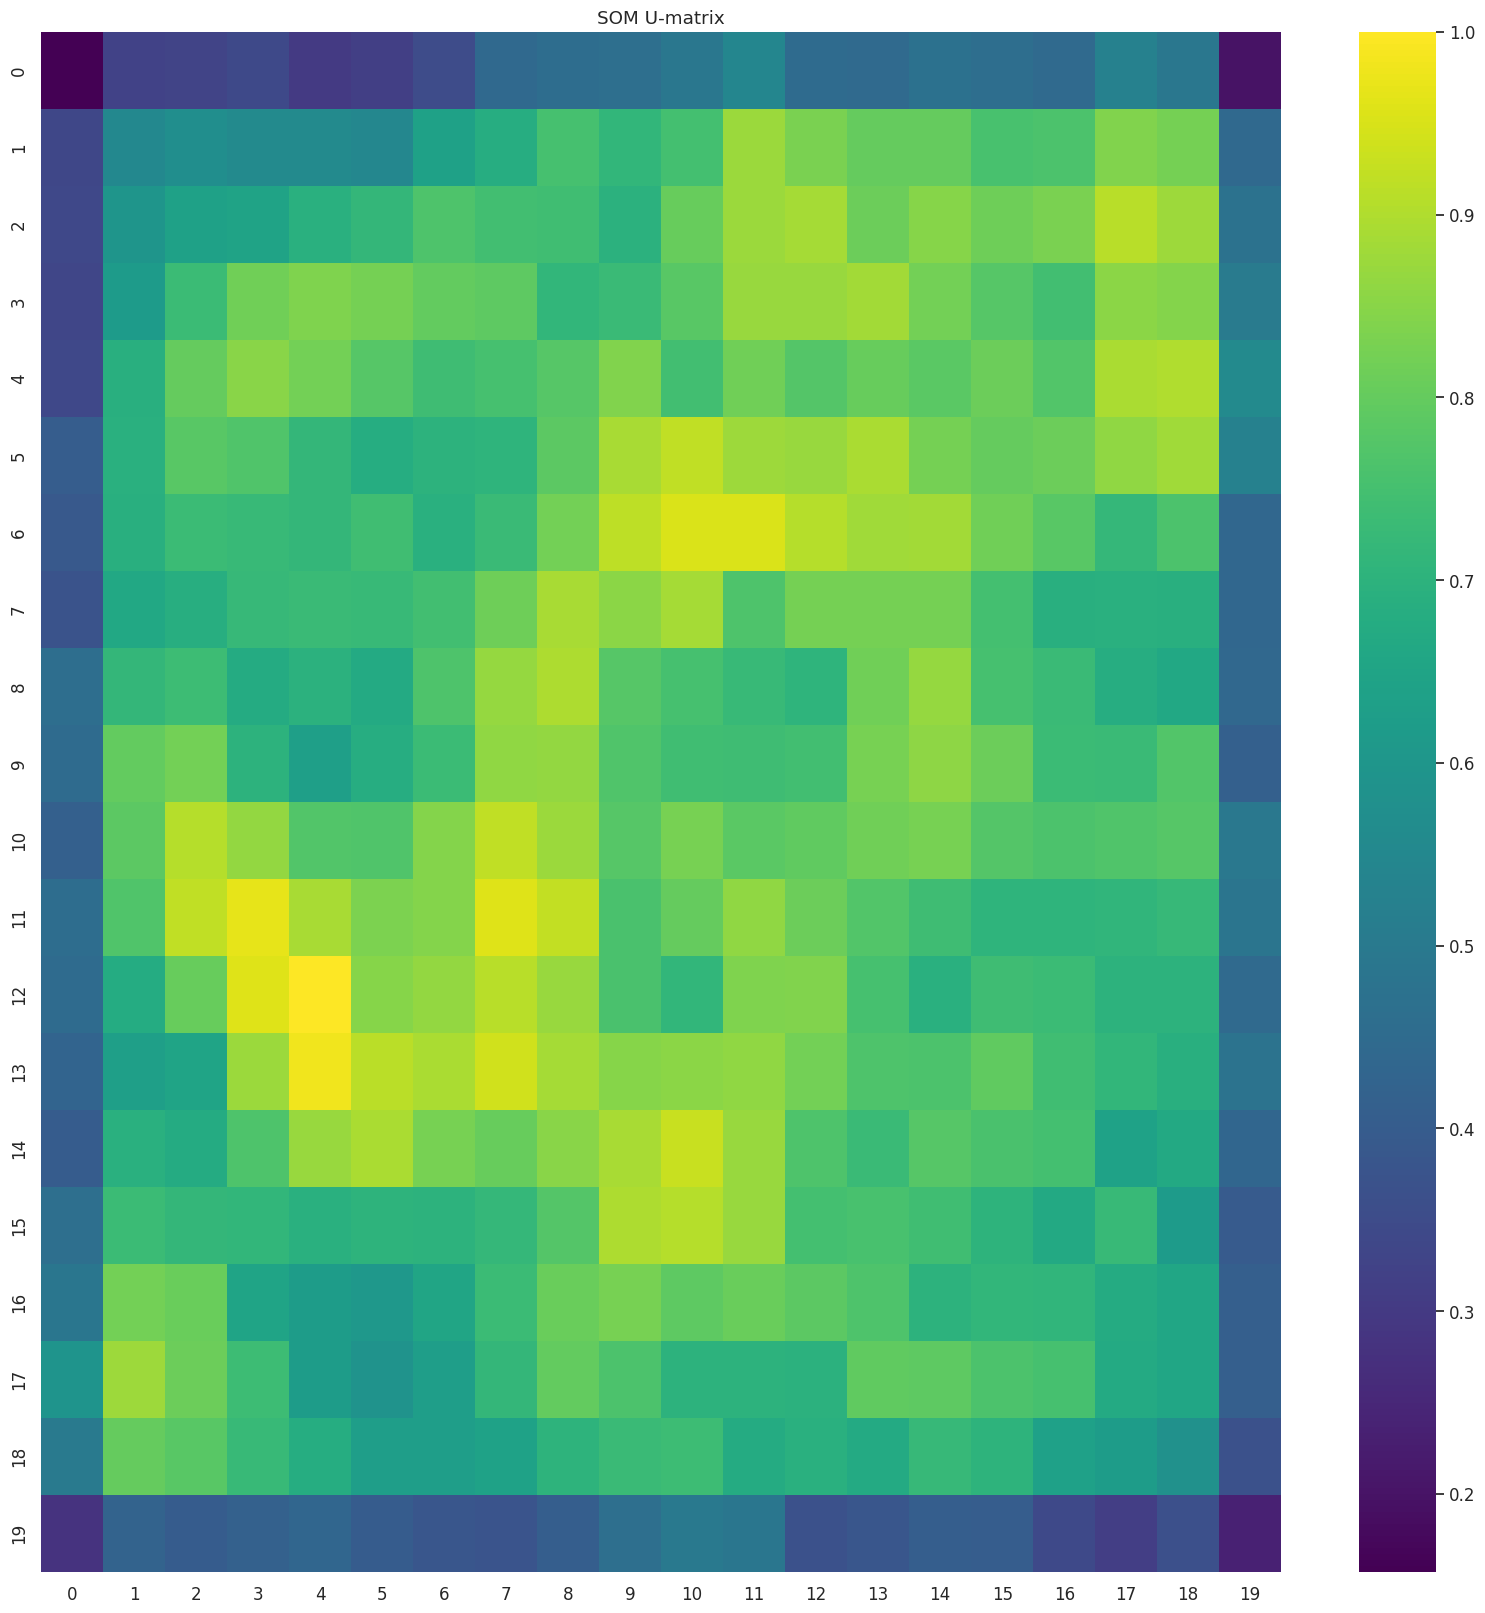

In [8]:
# Compute the U-matrix
u_matrix = som.distance_map()

# Visualize the U-matrix
plt.figure(figsize=(grid_cols, grid_rows))
sns.heatmap(u_matrix, cmap='viridis')
plt.title("SOM U-matrix")
plt.show()

## Map data and visualize labels

### Subtask:
Map the training data points to their corresponding BMUs on the SOM grid and visualize the most frequent label at each node.


**Reasoning**:
The instructions require mapping the training data to the SOM and visualizing the most frequent label at each node. This involves iterating through the data, finding the BMU for each data point, storing the corresponding label, and then determining the most frequent label for each node. This can be achieved in a single code block.



/tmp/ipython-input-33821315.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', 11) # 10 for labels 0-9, 1 for placeholder


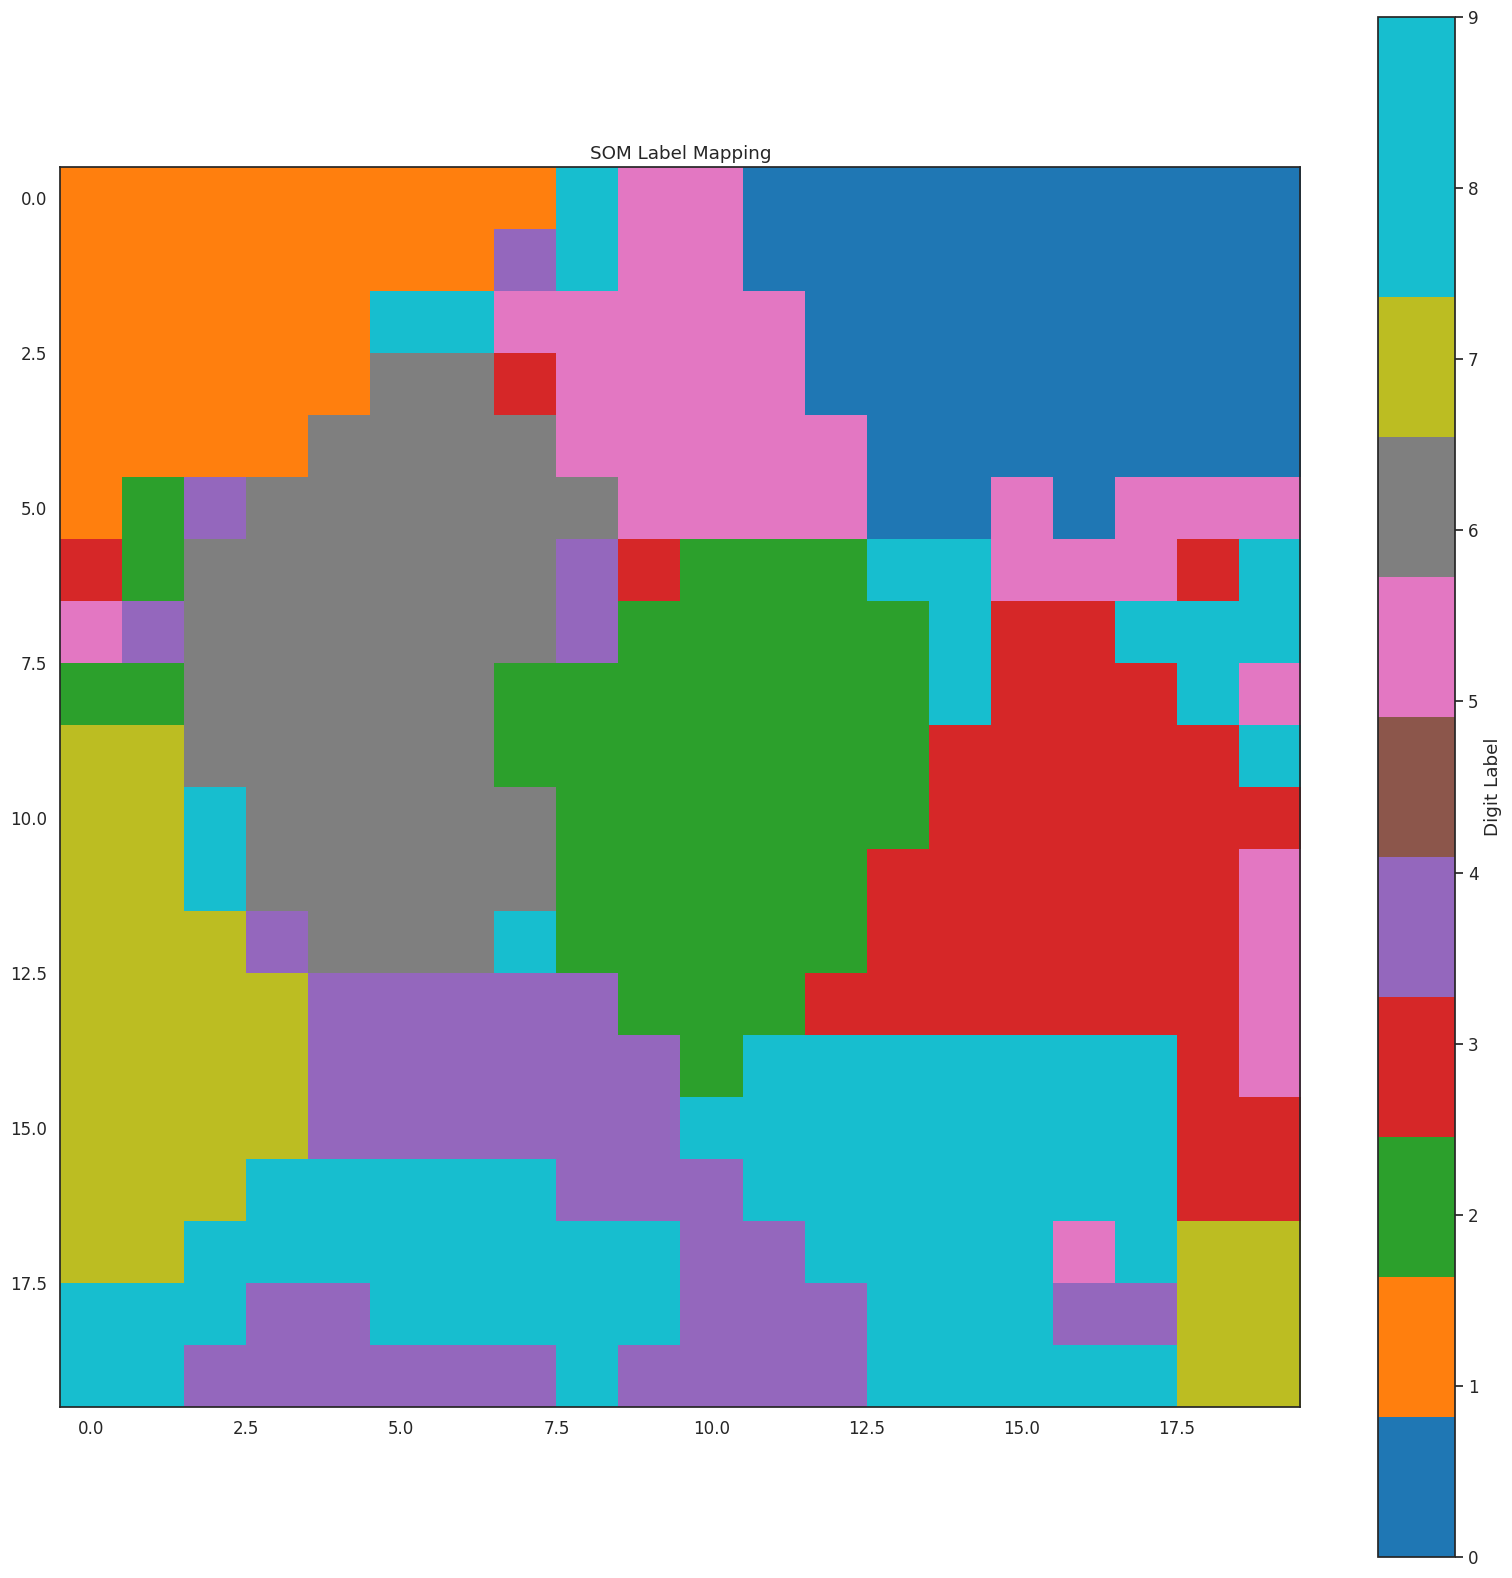

In [9]:
# Create empty arrays for label mapping
label_map = np.zeros((grid_rows, grid_cols))
win_map = [[[] for _ in range(grid_cols)] for _ in range(grid_rows)]

# Map data points to BMUs and store labels
for i, data_point in enumerate(X):
    bmu = som.winner(data_point)
    win_map[bmu[0]][bmu[1]].append(y[i])

# Determine the most frequent label for each node
for i in range(grid_rows):
    for j in range(grid_cols):
        if win_map[i][j]:
            # Count occurrences of each label and find the most frequent
            label_counts = np.bincount(win_map[i][j])
            most_frequent_label = np.argmax(label_counts)
            label_map[i, j] = most_frequent_label
        else:
            # Assign a placeholder value (e.g., -1) or handle empty nodes as needed
            # For visualization, we can assign a value outside the label range (0-9)
            label_map[i, j] = -1 # Or some other indicator for empty nodes

# Visualize the label map
plt.figure(figsize=(grid_cols, grid_rows))
# Use a colormap that can distinguish 10 labels + potentially the placeholder
cmap = plt.cm.get_cmap('tab10', 11) # 10 for labels 0-9, 1 for placeholder
plt.imshow(label_map, cmap=cmap, interpolation='nearest')
plt.colorbar(ticks=np.arange(-1, 10), label='Digit Label') # Adjust ticks for placeholder
plt.title("SOM Label Mapping")
plt.show()

## Summary:

### Data Analysis Key Findings

*   The weight vectors of each neuron were successfully reshaped from 784 dimensions to 28x28 images and visualized on the SOM grid, revealing the visual features learned by each neuron.
*   The U-matrix was computed and visualized as a heatmap, showing the distances between neighboring neurons. Areas of low distance indicate potential clusters, while areas of high distance represent boundaries.
*   Training data points were mapped to their best matching units (BMUs) on the SOM grid, and the most frequent digit label for each node was determined and visualized. This visualization shows how the SOM has organized the data by digit class across its grid.

### Insights or Next Steps

*   The visualizations of neuron weights and the U-matrix provide insights into the SOM's learned representation and potential data clusters, which can be further explored.
*   The label mapping visualization demonstrates the SOM's ability to group similar digits together on the grid, indicating a successful unsupervised organization of the data based on visual features.


## Summary:

### Data Analysis Key Findings

* Duplicate cells in the notebook were identified and successfully removed.
* The initial steps of the remaining workflow were verified to be operational, successfully loading the required dataframes (`train_df`, `X`, and `y`).

### Insights or Next Steps

* Continue the manual execution of the notebook cells to ensure the entire workflow is coherent and executable.
* Address any errors or broken dependencies encountered during the verification process.
